# Assignment 8
## Due June 20th at 12:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

# Exercise 1 (Bootstrap, 2+1+1+2+3 points)

## a)
\begin{align}
    P(X_i \mid \theta) 
    &= \begin{cases} \frac{1}{\theta} & \text{if } X_i \geq \theta \\ 0 & \text{else} \end{cases} \\
    P(X \mid \theta) 
    &= \begin{cases} \frac{1}{\theta} & \text{if } X_i \geq \theta \quad \forall i = 1, \dots,n\\ 0 & \text{else} \end{cases} \\
    &= \begin{cases} \frac{1}{\theta} & \text{if } \max_i X_i \geq \theta \\ 0 & \text{else} \end{cases} \\
    \implies \hat\theta_n &= \arg\max_{\theta} P(X \mid \theta) = \max_i X_i \\\\
    F_{\hat\theta_n}(z) 
    &= P(\hat\theta_n\leq z) \\
    &= P(\max_i X_i \leq z)  \\
    &= \begin{cases}0 & \text{if } z<\max_i X_i \\ 1 &\text{else}\end{cases}
\end{align}


## b)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### b)

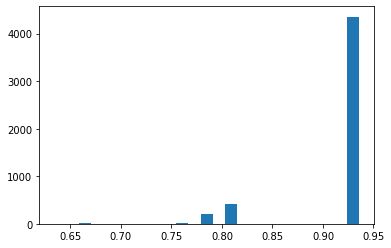

In [21]:
B=5000
n=25

# data points
X=np.random.rand(n)

# array holding the bootstrap estimates of theta
theta_nonparam_boot = np.zeros(B)

for i in range(B):
    # draw
    X_nb = np.random.choice(X, size=n)
    theta_nonparam_boot[i] = X_nb.max()


_ = plt.hist(theta_nonparam_boot, bins=n)

## c) 
\begin{align*}
    P(T^*_n \leq 0) 
    &=1-P(T^*_n \geq 0) \\
    &= 1-P(\hat\theta_n^* \leq \hat\theta_n)\\
    &= 1-P\left(\max_i X_i \not\in X^*\right) \\
    &= 1-\prod_j^n P(X^*_j \neq \max_i X_i) \\
    &= 1-\prod_j^n 1-\frac{1}{n} \\
    &= 1-\left( 1-\frac{1}{n}\right)^n \\
\end{align*}

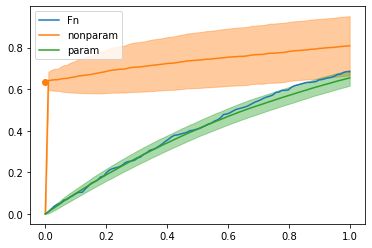

In [26]:
n_realizations = 500
B=200
n=25

Tn = np.zeros(n_realizations)
Tn_nb, Tn_pb = [np.zeros((n_realizations,B)) for _ in range(2)]

# compute T_n, T_n^* and T_n^~ for param. as well as nonparam. bootstrap
for i in range(n_realizations):
    X = np.random.rand(n)
    theta_hat = X.max()
    Tn[i] = n * (1-theta_hat)
    
    for j in range(B):
        X_nb = np.random.choice(X, size=n)
        X_pb = np.random.rand(n) * theta_hat
        Tn_nb[i,j] = n * (theta_hat - X_nb.max())
        Tn_pb[i,j] = n * (theta_hat - X_pb.max())
    

# for each realization compute the empirical cumulative distribution function (ecdf) of T_n across realizations and, for each realization, the ecdf of T_n^* and T_n^~ across bootstrap samples
zs = np.linspace(0,1,100)
Fn = np.zeros_like(zs)
Fn_nb, Fn_pb = [np.zeros((zs.shape[0],n_realizations)) for _ in range(2)]

for i, z in enumerate(zs):
    Fn[i] = 1/n_realizations * np.sum(Tn < z)
    for j in range(n_realizations):
        Fn_nb[i,j] = 1/B * np.sum(Tn_nb[j] < z)
        Fn_pb[i,j] = 1/B * np.sum(Tn_pb[j] < z)
        

# plot the empirical distribution functions with uncertainty bands across realizations
plt.plot(zs, Fn, label = 'Fn')
plt.plot(zs, [Fn_nb[iz,:].mean() for iz in range(zs.shape[0])], label = 'nonparam')
plt.fill_between(zs, [Fn_nb[iz,:].mean()-Fn_nb[iz,:].std() for iz in range(zs.shape[0])],[Fn_nb[iz,:].mean()+Fn_nb[iz,:].std() for iz in range(zs.shape[0])], alpha = 0.4, color = 'tab:orange')
plt.plot(zs, [Fn_pb[iz,:].mean() for iz in range(zs.shape[0])], label = 'param')
plt.fill_between(zs, [Fn_pb[iz,:].mean()-Fn_pb[iz,:].std() for iz in range(zs.shape[0])],[Fn_pb[iz,:].mean()+Fn_pb[iz,:].std() for iz in range(zs.shape[0])], alpha = 0.4, color = 'tab:green')
plt.scatter(0,1-np.exp(-1),color='tab:orange')
plt.legend()

## Exercise 2

## Exercise 3


In [2]:
with open('rfdata_train.npy', 'rb') as f:
    X_train = np.load(f)
    y_train = np.load(f)

with open('rfdata_test.npy', 'rb') as f:
    X_test = np.load(f)
    y_test = np.load(f)

### a)

In [9]:
from sklearn.ensemble import RandomForestRegressor

n_trees = [1,10,100,1000]
n_inleaf = [1,5,10]

train_scores, test_scores = [np.zeros((len(n_trees),len(n_inleaf))) for _ in range(2)]

# save scores to index [i_tree, i_inleaf] and make a heatmap
# YOUR CODE HERE

### Conclusions:

YOUR ANSWER HERE

### b)

In [10]:
n_train, n_feat = X_train.shape

# make heatmaps of train and test score for various choices of number of features per split and number of samples per bootstrap sample
# YOUR CODE HERE

NameError: name 'X_train' is not defined

### Conclusions:

YOUR ANSWER HERE

In [7]:
inform_features = np.array([ 2,  9, 14, 19, 20, 25, 27, 29, 42, 45, 46, 47])

# find 12 features that are important for the random forest
# YOUR CODE HERE

len(np.intersect1d(inform_features, rf_features)) == 12

NameError: name 'rf_features' is not defined

### What did you do?
YOUR ANSWER HERE

### What could you do instead?

YOUR ANSWER HERE